In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings("ignore")


## Read

In [3]:
df = pd.read_csv('final.csv')

In [4]:
df

,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,album_id,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_date,popularity,artist_pop,genres
0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0,0.904,0.813,...,0.031100,0.006970,0.0471,0.8100,125.461,4.000000,2005,65.0,72.0,dance_pop hip_hop hip_pop neo_soul pop_rap r&b...
1,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),0,0.664,0.759,...,0.002380,0.000000,0.0598,0.7010,99.252,4.000000,2003,15.0,87.0,pop r&b
2,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,0,0.892,0.714,...,0.201000,0.000234,0.0521,0.8170,100.972,4.000000,2002,78.0,83.0,dance_pop pop
3,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,0,0.853,0.606,...,0.056100,0.000000,0.3130,0.6540,94.759,4.000000,2000,0.0,74.0,dance_pop pop_rap reggae_fusion
4,Usher,spotify:track:0XUfyU2QviPAs6bxSpXYG4,spotify:artist:23zg3TcAtWQy7J6upgbUnj,Yeah!,spotify:album:0vO0b1AvY49CPQyVisJLj0,250373,Confessions,0,0.881,0.788,...,0.021200,0.000000,0.0377,0.5920,104.997,4.000000,2004,0.0,83.0,atl_hip_hop contemporary_r&b dance_pop pop r&b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204858,Tiësto,spotify:track:1EavLSmwRWtmkKEmlCfFzT,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,Wasted,spotify:album:584m4QL0kmpG69zSpMKvv8,188371,Wasted,1000407,0.645,0.832,...,0.001060,0.002640,0.1990,0.3750,112.028,3.885398,2014,47.0,84.0,"big room, brostep, dutch edm, edm, house, pop ..."
2204859,Lush & Simon,spotify:track:7bxnKAamR3snQ1VGLuVfC1,spotify:artist:0UN8vGMxWEBKNNu8NtyF96,City Of Lights - Official Radio Edit,spotify:album:2azRoBBWEEEYhqV6sb7JrT,204375,City Of Lights (Vocal Mix),1000407,0.428,0.922,...,0.076600,0.000000,0.0668,0.2100,128.170,3.885398,2014,42.0,37.0,"progressive electro house, sky room"
2204860,Tegan and Sara,spotify:track:5Aevni09Em4575077nkWHz,spotify:artist:5e1BZulIiYWPRm8yogwUYH,Closer - Sultan & Ned Shepard Remix,spotify:album:6kD6KLxj7s8eCE3ABvAyf5,353120,Closer Remixed,1000407,0.522,0.786,...,0.001710,0.004270,0.3750,0.4000,128.041,3.885398,2013,20.0,58.0,"canadian indie, lilith, metropopolis, permanen..."
2204861,Mat Zo,spotify:track:2m69mhnfQ1Oq6lGtXuYhgX,spotify:artist:2n7USVO8fO8FF8zq4kG2N1,Only For You - Maor Levi Remix,spotify:album:1fGrOkHnHJcStl14zNx8Jy,367432,Only For You (Remixes),1000407,0.626,0.888,...,0.007920,0.127000,0.3430,0.3080,128.008,3.885398,2014,15.0,43.0,"complextro, edm, electro house, progressive house"


In [5]:
df['release_date'].isnull().sum()

0

In [6]:
df.columns

Index(['artist_name', 'track_uri', 'artist_uri', 'track_name', 'album_uri',
       'duration_ms', 'album_name', 'album_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'release_date', 'popularity', 'artist_pop', 'genres'],
      dtype='object')

## EDA

In [7]:
df_for_eda = df.copy()

In [8]:
df_for_eda['genres'] = df_for_eda['genres'].str.split()
df_exploded = df_for_eda.explode('genres')
df_exploded = df_exploded.rename(columns={'genres': 'genre'})
df_genres_extracted = df_exploded.reset_index().rename(columns={'index': 'song_id'})

### Top10 least popular songs

In [9]:
least_popular = df_for_eda.sort_values('popularity', ascending=True).head(10) 
least_popular[['release_date', 'track_name', 'artist_name']]

,release_date,track_name,artist_name
917724,2017,Radar - Redux,Lonely The Brave
1446149,2011,Messiah in America: XXXIV. Amen (Chorus),Millennial Choirs & Orchestras
790350,2014,Balança (Não Pode Parar!),Bossacucanova
1992420,2007,The Naturals,Catherine
790352,2011,Vá Morar Com O Diabo,Cássia Eller
1446147,2011,"Messiah in America: XXXI. Verily, Verily, I Sa...",Millennial Choirs & Orchestras
790357,1998,Samba Pra Vinícius,Toquinho
790358,2014,Zana,Toquinho
1446144,2011,Messiah in America: XXVII. And Jesus Arose (Alto),Millennial Choirs & Orchestras
1992418,2006,Homeland Insecurity,Endwell


### Top10 most popular songs

In [10]:
most_popular = df_for_eda.sort_values('popularity', ascending=False).drop_duplicates(subset='track_name').head(10)
most_popular[['release_date', 'track_name', 'artist_name']]

,release_date,track_name,artist_name
2194793,2019,Dance Monkey,Tones and I
2195927,2019,ROXANNE,Arizona Zervas
2197254,2019,Memories,Maroon 5
2193846,2019,Tusa,KAROL G
2195843,2019,The Box,Roddy Ricch
2202418,2019,Blinding Lights,The Weeknd
2193453,2019,Circles,Post Malone
2194585,2018,Falling,Trevor Daniel
2197252,2019,Don't Start Now,Dua Lipa
2182037,2019,everything i wanted,Billie Eilish


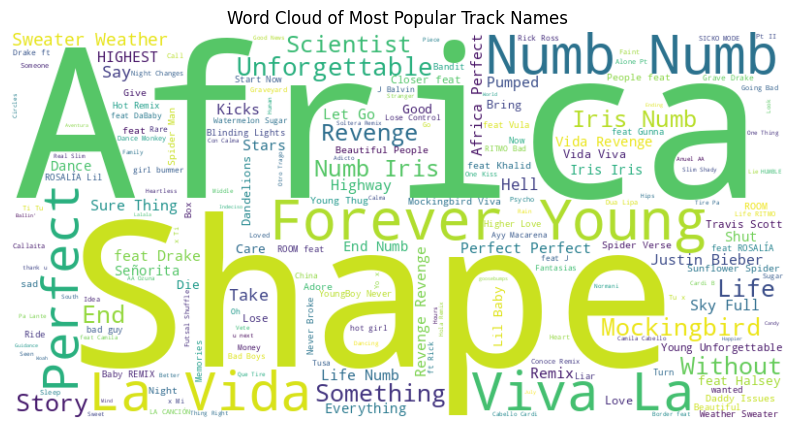

In [11]:
most_popular = df_for_eda.sort_values('popularity', ascending=False).head(2000)
track_names = ' '.join(most_popular['track_name'])
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(track_names)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Popular Track Names')
plt.show()

### Visualizing through a correlation map

In [12]:
# !pip3 install yellowbrick

In [13]:
df_for_eda['duration']=df_for_eda['duration_ms'].apply(lambda x : round((x/60000),2))
df_genres_extracted['duration']=df_genres_extracted['duration_ms'].apply(lambda x : round((x/60000),2))
df_for_eda.duration.head()

0    3.78
1    3.93
2    4.45
3    3.79
4    4.17
Name: duration, dtype: float64

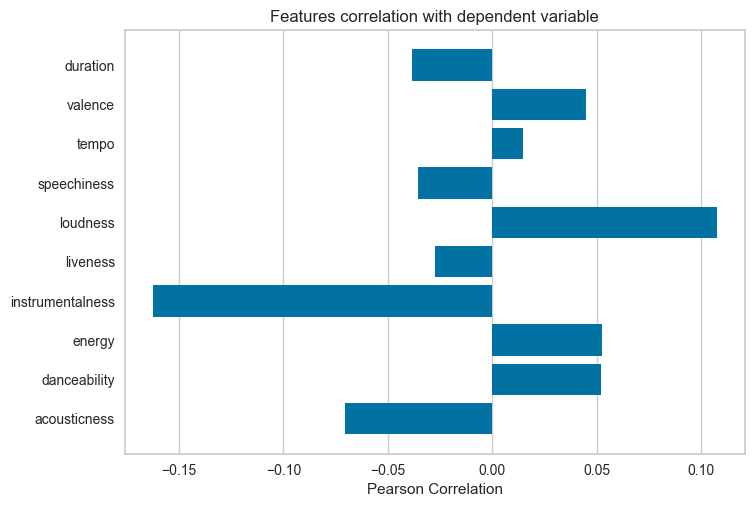

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [14]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration']

X, y = df_for_eda[feature_names], df_for_eda['popularity']
features = np.array(feature_names)
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X, y)
visualizer.show()

[Text(0.5, 0, 'danceability'),
 Text(1.5, 0, 'energy'),
 Text(2.5, 0, 'loudness'),
 Text(3.5, 0, 'speechiness'),
 Text(4.5, 0, 'acousticness'),
 Text(5.5, 0, 'instrumentalness'),
 Text(6.5, 0, 'liveness'),
 Text(7.5, 0, 'valence'),
 Text(8.5, 0, 'tempo'),
 Text(9.5, 0, 'time_signature'),
 Text(10.5, 0, 'popularity'),
 Text(11.5, 0, 'artist_pop'),
 Text(12.5, 0, 'duration')]

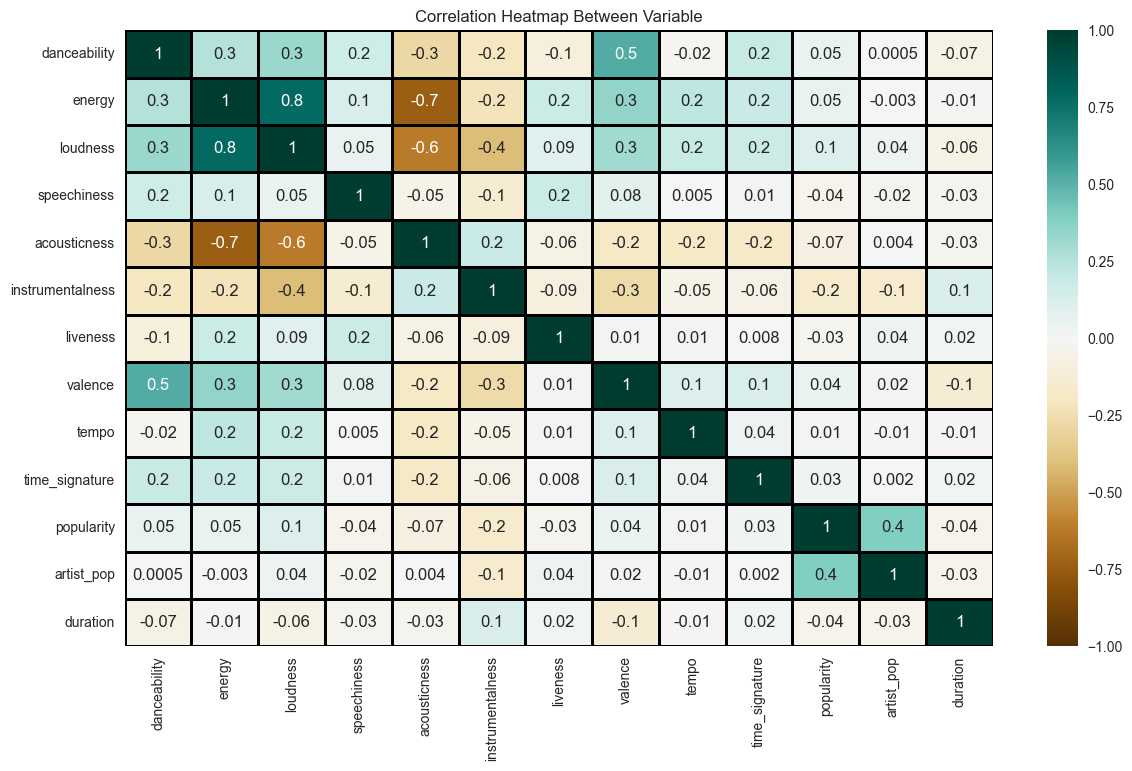

In [15]:
corr_df=df_for_eda.drop(['key','artist_name','track_uri', 'album_uri', 'artist_uri', 'mode','duration_ms', 'track_name', 'album_name', 'release_date',  'genres', 'album_id'], axis=1).corr(method='pearson')
plt.figure(figsize=(14,8))
heatmap=sns.heatmap(corr_df, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap="BrBG", linewidths=2, linecolor="Black"
)
heatmap.set_title('Correlation Heatmap Between Variable')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

### Bar plot to visualize the correlation between the duration of songs and their different genres

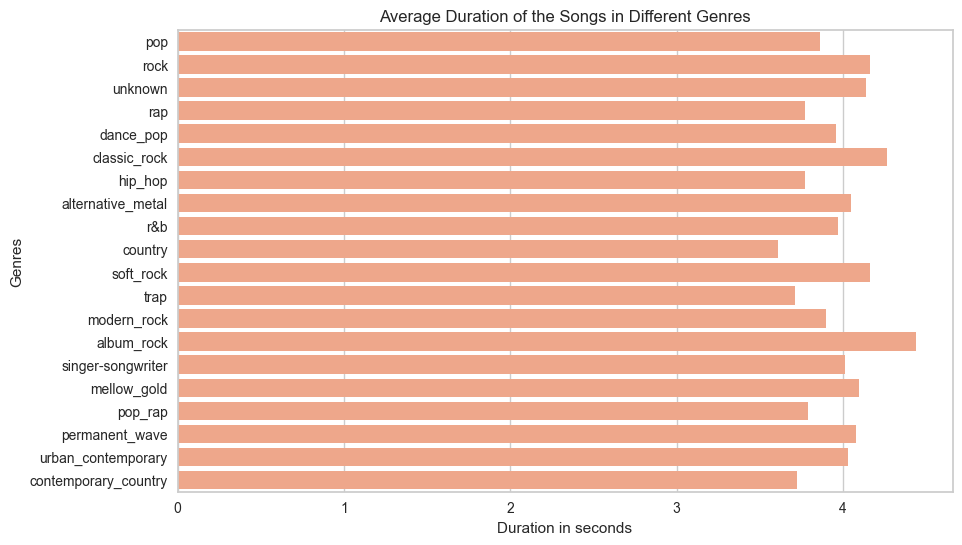

In [16]:
top_genres = df_genres_extracted.groupby('genre').agg({
    'popularity': 'sum',
    'duration': 'mean' 
}).nlargest(20, 'popularity').reset_index()

plt.figure(figsize=(10, 6))
plt.title("Average Duration of the Songs in Different Genres")
sns.barplot(y='genre', x='duration', data=top_genres, color='lightsalmon')
plt.xlabel("Duration in seconds")
plt.ylabel("Genres")
plt.show()

### Bar plot to visualize the duration of songs over the years

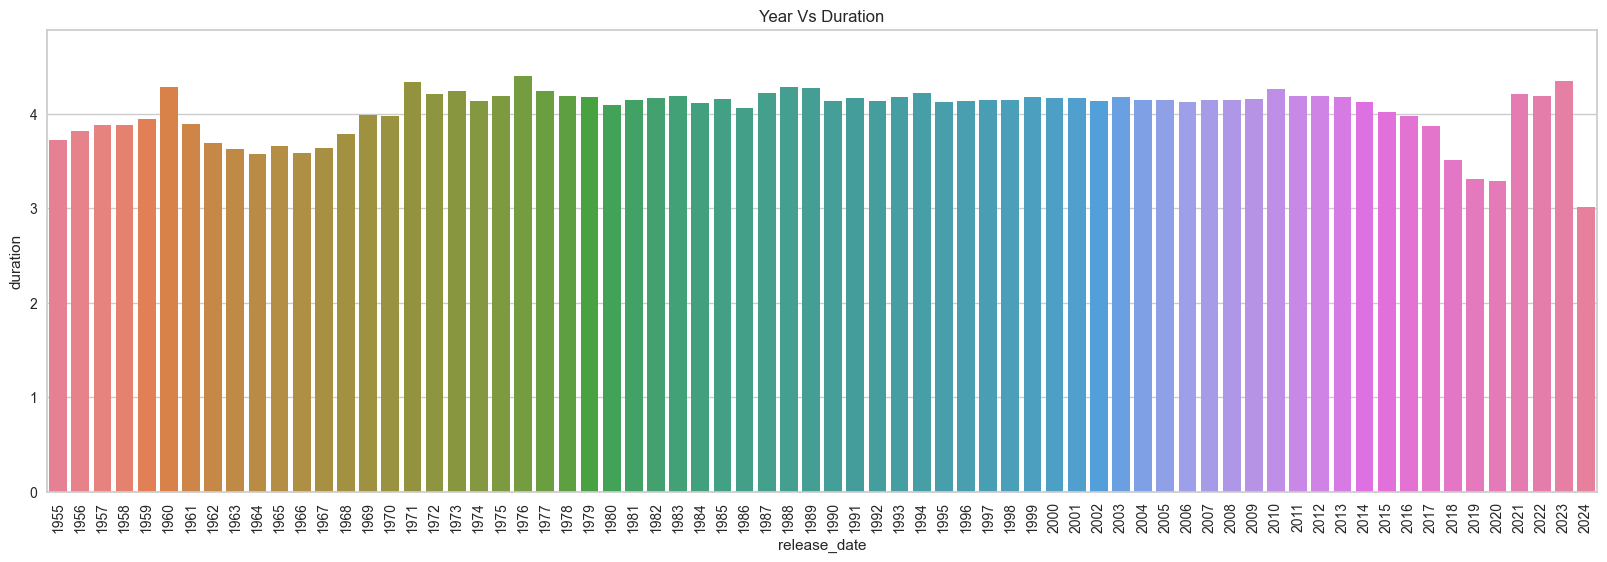

In [17]:
df_for_eda = df_for_eda.sort_values(by='release_date')
df_for_eda['release_date'] = pd.to_numeric(df_for_eda['release_date'], errors='coerce')
df_for_eda = df_for_eda[(df_for_eda['release_date'] >= 1900) & (df_for_eda['release_date'] <= 2024)]
plt.figure(figsize=(20, 6))
plt.title("Duration of the Songs over the Years")
palette = sns.color_palette("husl", len(df_for_eda['release_date'].unique()))

sns.barplot(
    x="release_date", 
    y="duration", 
    errwidth=False, 
    data=df_for_eda, 
    palette=palette
).set(title='Year Vs Duration')

plt.xticks(rotation=90)
plt.show()

### How the overall sound of music has changed from 1921 to 2020...

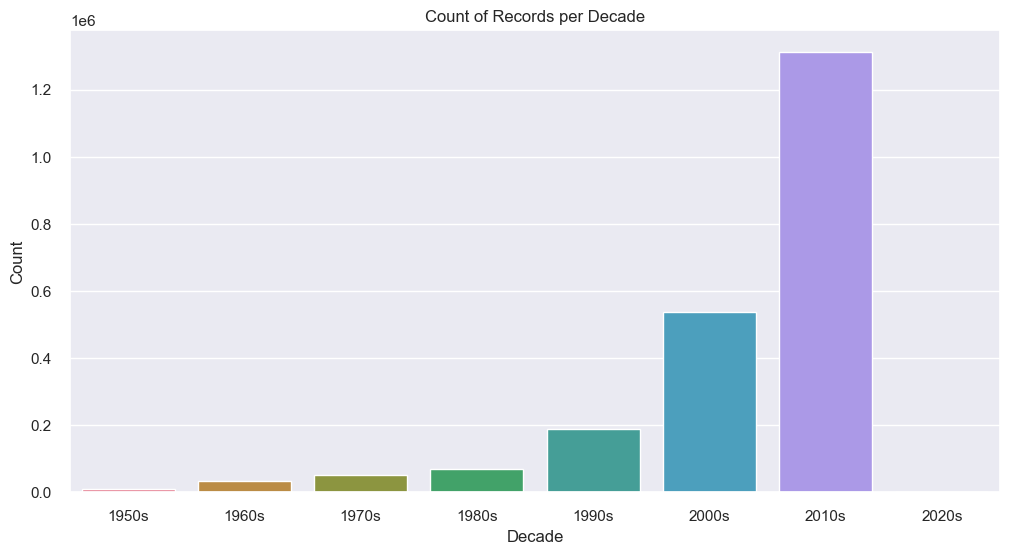

In [18]:
import pandas as pd
def extract_decade(year):
    try:
        start_period = int(year) // 10 * 10
        return start_period
    except (ValueError, TypeError):
        return None

df_for_eda['release_date'] = pd.to_numeric(df_for_eda['release_date'], errors='coerce')

df_for_eda['decade'] = df_for_eda['release_date'].apply(extract_decade)
df_further = df_for_eda.copy()
df_further = df_further.dropna(subset=['decade'])
df_further['decade_str'] = df_further['decade'].apply(lambda x: f"{int(x)}s")
plt.figure(figsize=(12, 6))
sns.set(rc={'figure.figsize': (10, 5)})
sns.countplot(data=df_further, x='decade_str', palette='husl')
plt.xticks()
plt.title("Count of Records per Decade")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.show()


In [19]:
decade_distribution = df_for_eda['decade'].value_counts().sort_index()
print(decade_distribution)

1950       9688
1960      33306
1970      53192
1980      68692
1990     189390
2000     537565
2010    1312013
2020       1017
Name: decade, dtype: int64


In [20]:
decade_percentage = (df_for_eda['decade'].value_counts(normalize=True) * 100).sort_index()
print(decade_percentage)

1950     0.439392
1960     1.510570
1970     2.412485
1980     3.115477
1990     8.589649
2000    24.380880
2010    59.505421
2020     0.046125
Name: decade, dtype: float64


In [21]:
df_for_eda['year'] = df_for_eda['release_date'].apply(lambda x: str(x)[:4])
sound_features = ['acousticness', 'liveness', 'instrumentalness', 'energy', 'danceability', 'valence']
year_data = df_for_eda[['year', 'acousticness', 'liveness', 'instrumentalness', 'energy', 'danceability', 'valence']]
year_data = year_data.groupby('year')[sound_features].mean().reset_index()
fig = px.line(year_data, x='year', y=sound_features, title="Changes in Sound Features Over Years")
fig.show()

### Characteristics of various genres

Using the audio features for different genres we can compare them and their unique differences in music.

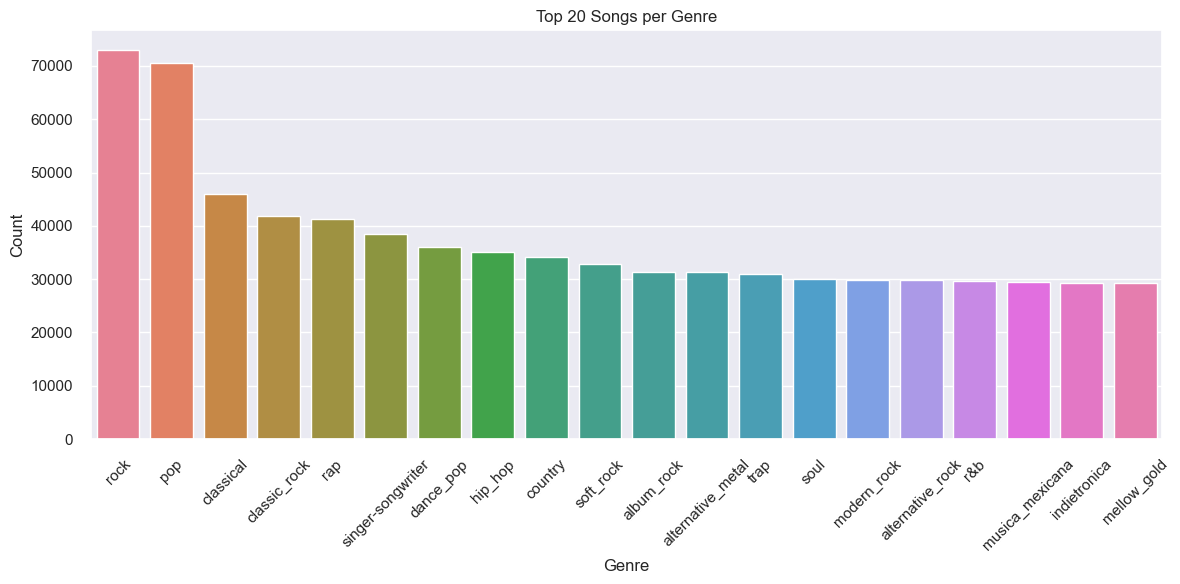

In [22]:
df_genres_extracted = df_genres_extracted[df_genres_extracted['genre'] != 'unknown']

top_n = 20
unique_genre_counts = df_genres_extracted['genre'].value_counts().head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(x=unique_genre_counts.index, y=unique_genre_counts.values, palette='husl')
plt.title(f'Top {top_n} Songs per Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [23]:
df_genres_extracted['genre'] = df_genres_extracted['genre'].astype(str)

df_genres_extracted = df_genres_extracted[df_genres_extracted['genre'].notna() & (df_genres_extracted['genre'] != 'nan') & (df_genres_extracted['genre'] != '')]

genre_data = df_genres_extracted.groupby('genre').agg({
    'popularity': 'sum',
    'valence': 'mean',
    'energy': 'mean',
    'danceability': 'mean',
    'acousticness': 'mean'
}).reset_index()

if not genre_data.empty:
    top_genres = genre_data.nlargest(15, 'popularity')
    fig = px.bar(
        top_genres, 
        x='genre', 
        y=['valence', 'energy', 'danceability', 'acousticness'], 
        barmode='group',
        title="Audio Features of Top 10 Genres",
        labels={'value': 'Feature Value', 'genre': 'Genres'}
    )
    fig.show()
else:
    print("No data available for plotting.")

In [24]:
song_count = df.groupby('album_id').size().reset_index(name='song_count')
song_count_dict = song_count.set_index('album_id')['song_count'].to_dict()
song_count_dict

{0: 50,
 1: 39,
 2: 62,
 3: 125,
 4: 17,
 5: 72,
 6: 16,
 7: 52,
 8: 46,
 9: 20,
 10: 72,
 11: 128,
 12: 9,
 13: 13,
 14: 95,
 15: 7,
 16: 102,
 17: 73,
 18: 67,
 19: 83,
 20: 14,
 21: 14,
 22: 39,
 23: 20,
 24: 7,
 25: 38,
 26: 24,
 27: 11,
 28: 75,
 29: 31,
 30: 145,
 31: 91,
 32: 94,
 33: 16,
 34: 68,
 35: 55,
 36: 9,
 37: 67,
 38: 40,
 39: 55,
 40: 56,
 41: 184,
 42: 116,
 43: 17,
 44: 28,
 45: 49,
 46: 11,
 47: 14,
 48: 20,
 49: 45,
 50: 35,
 51: 33,
 52: 13,
 53: 93,
 54: 5,
 55: 108,
 56: 18,
 57: 19,
 58: 37,
 59: 111,
 60: 53,
 61: 6,
 62: 20,
 63: 32,
 64: 86,
 65: 109,
 66: 74,
 67: 8,
 68: 152,
 69: 16,
 70: 69,
 71: 12,
 72: 189,
 73: 23,
 74: 5,
 75: 13,
 76: 25,
 77: 21,
 78: 14,
 79: 16,
 80: 51,
 81: 34,
 82: 25,
 83: 52,
 84: 28,
 85: 35,
 86: 26,
 87: 24,
 88: 58,
 89: 85,
 90: 95,
 91: 58,
 92: 6,
 93: 40,
 94: 81,
 95: 133,
 96: 18,
 97: 224,
 98: 76,
 99: 42,
 100: 21,
 101: 18,
 102: 40,
 103: 159,
 104: 49,
 105: 70,
 106: 98,
 107: 22,
 108: 49,
 109: 124,
 110

In [25]:

max_key_value = max(song_count_dict.keys())
print(f"Максимальний ключ у словнику: {max_key_value}")



Максимальний ключ у словнику: 1000457


In [26]:
num_keys = len(song_count_dict)
print(f"Кількість ключів у словнику: {num_keys}")

Кількість ключів у словнику: 332237


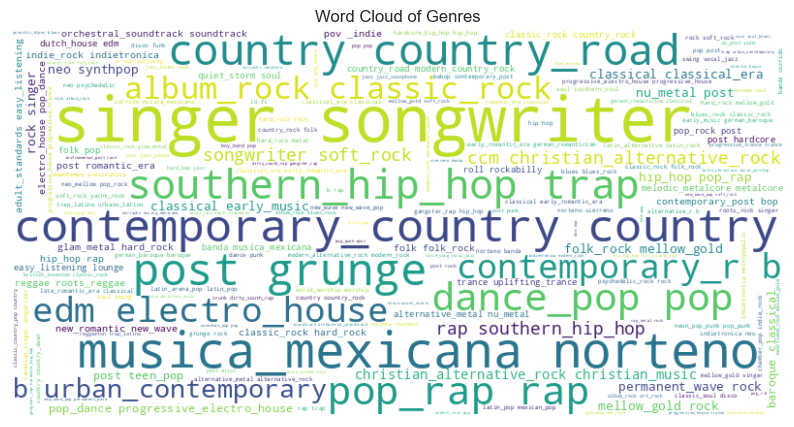

In [27]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_genres_extracted['genre']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()